<a href="https://colab.research.google.com/github/justin02-dev/MNIST_Number_Predictor/blob/master/MNIST_Number_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install necessary libraries
!pip install torch
!pip install torchvision
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install sklearn

In [17]:
#import necessary libraries
import torch #overall torch package
import torch.nn as nn #subpackage to help with building networks
import torch.optim as optim #subpackage with optimizers like SGD or Adam
import torch.nn.functional as F #Interface with typical operations for building networks like loss and convolutions

import torchvision.datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader #dataloader for iterating through data

import numpy as np
import matplotlib.pyplot as plt

In [29]:
#load MNIST training dataset, store in /data, convert to a Tensor, Normalized
train_set = torchvision.datasets.MNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean,std)
    ])
)
#load the data with a batch size of 1000 and shuffle it
train_loader = torch.utils.data.DataLoader(train_set
    ,batch_size=1000
    ,shuffle=True
)



In [30]:
#define hyperparameters
batch_size = 100
lr = 0.01

#create our Netowrk
network = nn.Sequential(
      nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
    , nn.ReLU()
    , nn.MaxPool2d(kernel_size=2, stride=2)
    , nn.BatchNorm2d(6)
    , nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
    , nn.ReLU()
    , nn.MaxPool2d(kernel_size=2, stride=2)
    , nn.Flatten(start_dim=1)  
    , nn.Linear(in_features=12*4*4, out_features=120)
    , nn.ReLU()
    , nn.BatchNorm1d(120)
    , nn.Linear(in_features=120, out_features=60)
    , nn.ReLU()
    , nn.Linear(in_features=60, out_features=10)
)


train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size) #load training data with a batch size
optimizer = optim.Adam(network.parameters(), lr=lr) #create optimizer to use 

In [31]:
#function to return number of correct predictions
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

#function to display image(s)
def show_batch(batch):
    im = torchvision.utils.make_grid(batch)
    plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))  

In [ ]:
for epoch in range(10):
  total_correct = 0
  for data in train_loader:
    images, labels = data
    preds = network(images)
    loss = F.cross_entropy(preds, labels) # Calculate Loss
    optimizer.zero_grad()
    loss.backward() # Calculate Gradients
    optimizer.step() # Update Weights
    total_correct += get_num_correct(preds, labels)
  #output data
  print(
      "epoch:", epoch, 
      "total_correct:", total_correct, 
      "loss:", loss.item(),
      '% correct', total_correct/60000
  )

In [ ]:
#load MNIST testing dataset, store in /data, convert to a Tensor, Normalized
test_set = torchvision.datasets.MNIST(
    root='./data'
    ,train=False
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean,std)
    ])
)
#load the data with a batch size of 1000 and shuffle it
test_loader = torch.utils.data.DataLoader(test_set
    ,batch_size=100
    ,shuffle=True
)
test_loader = DataLoader(test_set, batch_size=10000, shuffle=True, num_workers=1)
data = next(iter(test_loader))
print(data[0].shape)

In [ ]:
total_correct = 0
for data in test_loader:
    images, labels = data
    preds = network(images)
    total_correct += get_num_correct(preds, labels)

#output data
print(
    "epoch:", epoch, 
    "total_correct:", total_correct, 
    "loss:", loss.item(),
    '% correct', total_correct/10000
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


guess: 2 label: tensor(2) correct: True


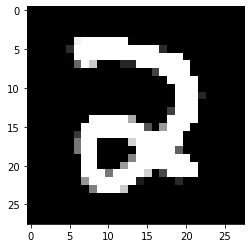

In [44]:
index = 0 #display and classify the image at this index, 0-9999
network.eval() 
total_correct = 0
images, labels = data
images = images[index]
images = torch.unsqueeze(images, dim=0)
labels = labels[index]
preds = network(images)
total_correct += get_num_correct(preds, labels)
show_batch(images)
#output data
print( 
    "guess:", preds.argmax().item(),
    "label:", labels,
    "correct:", (total_correct==1)
)